<a href="https://colab.research.google.com/github/Maiiiyasser/Face-Recognition/blob/main/face_recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!unzip archive.zip


In [ ]:
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
data =[]
label =[]
training_set=[]
training_set_labels=[]
test_set=[]
test_set_labels=[]
def create_datamatrix():
  id = 1
  for id in range(1,41):
    for count in range(1,11) :
      image = Image.open('s'+str(id)+'/'+str(count)+'.pgm')
      test = img_to_array(image)
      test = np.resize(test,(10304))
      data.append(test)
      label.append(id)
def create_training_test_sets():
  for i in range(400):
    if i%2==0:
      test_set.append(data[i])
      test_set_labels.append(label[i])
    else:
      training_set.append(data[i])
      training_set_labels.append(label[i])
create_datamatrix()
create_training_test_sets()

In [ ]:
import numpy as np
from numpy import linalg as LA
import scipy.linalg as la
from sklearn.decomposition import PCA
alpha = np.array([0.8,0.85,0.9,0.95])
D=np.array(data)
D_train=np.array(training_set)
D_test=np.array(test_set)
D_training_labels=np.array(training_set_labels)
D_test_labels=np.array(test_set_labels)
M=np.array(data).mean(0)
print("C.mean vector",M)
Z=data-M
print(D.shape)
print(M.shape)
covMatrix=1/400*np.dot(Z.T,Z)
w, v = la.eig(covMatrix)


C.mean vector [85.6175 85.5775 85.925  ... 76.87   75.865  75.2275]
(400, 10304)
(10304,)


In [ ]:
import numpy as np
from numpy import linalg as LA
import scipy.linalg as la
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
Accuracy=[]
idx = w.argsort()[::-1]   
eigenValues = w[idx]
eigenVectors = v[:,idx]
i=0
sum=0
while i<len(eigenValues):
  sum=sum+eigenValues[i]
  i=i+1 
r=0 
sum_2=0
k=0
while k<4 : 
  while sum_2/sum<alpha[k]:
     sum_2=sum_2+eigenValues[r]
     r=r+1 
  P=eigenVectors[:,0:r].T
  print("Alpha=",alpha[k])
  print("Projection matrix=",P)
#Projection
  M_train=np.array(training_set).mean(0)
  Z_train=np.subtract(D_train,M_train)
  K_train=np.dot(P,Z_train.T)
  #np.append(K_train,np.dot(P,Z_train.T))
  print("Projection of training set",K_train)
  M_test=np.array(D_test).mean(0)
  Z_test=np.subtract(D_test,M_test)
  K_test=np.dot(P,Z_test.T)
  #np.append(K_test,np.dot(P,Z_test.T))
  print("Projection of test set",K_test)
  knn_classifier = KNeighborsClassifier(n_neighbors = 1)
  knn_classifier.fit(K_train.real.T,D_training_labels)
  pred_test = knn_classifier.predict(K_test.real.T)
  correct_count = 0.0
  for a in range(len(D_test_labels)):
   if pred_test[a] == D_test_labels[a]:
      correct_count += 1.0
  accuracy = correct_count/float(len(D_test_labels)) 
  #print("Alpha=","{:.2f}".format(alpha[k]),"Accuracy=", accuracy) 
  Accuracy.append(accuracy) 
  k=k+1
l=0
A=np.array(Accuracy)
for l in range(4): 
 print("Alpha=","{:.2f}".format(alpha[l]),"Accuracy=", A[l]) 

Alpha= 0.8
Projection matrix= [[ 0.00212518+0.j  0.00211278+0.j  0.00214254+0.j ...  0.00704006+0.j
   0.00639096+0.j  0.00734477+0.j]
 [ 0.0146852 +0.j  0.01461398+0.j  0.01463183+0.j ... -0.01056104+0.j
  -0.0097007 +0.j -0.00881892+0.j]
 [-0.0199296 +0.j -0.02000915+0.j -0.0198385 +0.j ... -0.01416368+0.j
  -0.01439434+0.j -0.01487486+0.j]
 ...
 [-0.00143853+0.j -0.00272935+0.j -0.00056507+0.j ... -0.00875801+0.j
  -0.00441072+0.j -0.00701017+0.j]
 [-0.00050292+0.j -0.00088082+0.j -0.00125786+0.j ... -0.00195444+0.j
  -0.0039985 +0.j -0.00269717+0.j]
 [-0.00526534+0.j -0.00467387+0.j -0.0042428 +0.j ... -0.01105699+0.j
  -0.011643  +0.j -0.00935947+0.j]]
Projection of training set [[-2.9909294e+03+0.j -3.2574221e+03+0.j -2.5453425e+03+0.j ...
  -6.6970032e+02+0.j -8.5818036e+02+0.j -5.4986780e+02+0.j]
 [ 7.7405194e+02+0.j  1.1770571e+03+0.j  1.1434832e+03+0.j ...
   1.0453252e+03+0.j  9.6390192e+02+0.j  4.9105963e+02+0.j]
 [-4.7969046e+02+0.j -2.4298015e+02+0.j -2.2817049e+01+0.j ..

In [ ]:
mean = np.zeros((40,10304))
newarr = np.array_split(training_set, 40) 
for i in range(40):
  mean[i,:] = np.mean(newarr[i],axis=0)

overall_mean = np.mean(mean,axis=0).T

n=5
Sb = np.zeros((mean.shape[1],mean.shape[1]))
for i in range(mean.shape[0]):
  Sb = np.add(Sb,n* ((mean[i] - overall_mean) * (mean[i] - overall_mean).T))

In [ ]:
Z = np.zeros(np.array(training_set).shape)
for i in range(40):
  Z[i*5:(i*5)+5,:] = newarr[i] - mean[i]
Zi = np.array_split(Z,40)
S = np.zeros((10304,10304))
for i in range(40):
  temp = np.dot(Zi[i].T,Zi[i])
  S = S + temp

In [ ]:
A2 = np.linalg.pinv(S)

In [ ]:
import scipy as sc
w2, v2 = sc.linalg.eigh(np.dot(A2,Sb),eigvals=((10304-39),(10304-1)))
v2=v2[::-1]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
R_trainig_set = np.dot(training_set,v2)
R_test_set = np.dot(test_set,v2)

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(R_trainig_set,training_set_labels)
test_predict = classifier.predict(R_test_set.real)
true_predicted_count=0
for i in range(0,200):
  if test_predict[i] == test_set_labels[i]:
    true_predicted_count =true_predicted_count+1
print(true_predicted_count)    
accuracy = (true_predicted_count/200)
print("Accuracy for LDA: ",accuracy)
print("Accuracy for PCA when alpha=0.95: ",A[3])

188
Accuracy for LDA:  0.94
Accuracy for PCA when alpha=0.95:  0.945


PCA
Number of neighbors= 1
Alpha= 0.80 Accuracy= 0.945
Alpha= 0.85 Accuracy= 0.945
Alpha= 0.90 Accuracy= 0.95
Alpha= 0.95 Accuracy= 0.945
Number of neighbors= 3
Alpha= 0.80 Accuracy= 0.87
Alpha= 0.85 Accuracy= 0.87
Alpha= 0.90 Accuracy= 0.85
Alpha= 0.95 Accuracy= 0.85
Number of neighbors= 5
Alpha= 0.80 Accuracy= 0.84
Alpha= 0.85 Accuracy= 0.825
Alpha= 0.90 Accuracy= 0.835
Alpha= 0.95 Accuracy= 0.82
Number of neighbors= 7
Alpha= 0.80 Accuracy= 0.78
Alpha= 0.85 Accuracy= 0.765
Alpha= 0.90 Accuracy= 0.76
Alpha= 0.95 Accuracy= 0.75
LDA
Number of neighbors= 1 Accuracy= 0.94
Number of neighbors= 3 Accuracy= 0.85
Number of neighbors= 5 Accuracy= 0.78
Number of neighbors= 7 Accuracy= 0.72


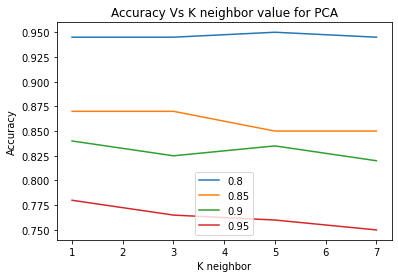

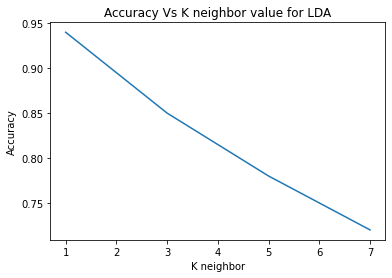

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
n=np.array([1,3,5,7])
i=0
Accuracy1=[]
#Accuracy1=np.array([[0,0,0,0], [0,0,0,0] ,[0,0,0,0], [0,0,0,0]])
Accuracy2=[]
j=0
print("PCA")
while j<4:
  print("Number of neighbors=",n[j])
  r=0 
  sum_2=0
  k=0
  while k<4 : 
    while sum_2/sum<=alpha[k]:
      sum_2=sum_2+eigenValues[r]
      r=r+1 
    P=eigenVectors[:,0:r].T
    #print("Alpha=",alpha[k])
    #print("Projection matrix=",P)
#Projection
    M_train=np.array(training_set).mean(0)
    Z_train=np.subtract(D_train,M_train)
    K_train=np.dot(P,Z_train.T)
    #np.append(K_train,np.dot(P,Z_train.T))
    #print("Projection of training set",K_train)
    M_test=np.array(D_test).mean(0)
    Z_test=np.subtract(D_test,M_test)
    K_test=np.dot(P,Z_test.T)
  #np.append(K_test,np.dot(P,Z_test.T))
    #print("Projection of test set",K_test)
    knn_classifier = KNeighborsClassifier(n_neighbors = n[j])
    knn_classifier.fit(K_train.real.T,D_training_labels)
    pred_test = knn_classifier.predict(K_test.real.T)
    correct_count = 0.0
    for a in range(len(D_test_labels)):
      if pred_test[a] == D_test_labels[a]:
        correct_count += 1.0
    accuracy = correct_count/float(len(D_test_labels)) 
    print("Alpha=","{:.2f}".format(alpha[k]),"Accuracy=", accuracy) 
    Accuracy1.append(accuracy) 
    k=k+1
  A=np.array(Accuracy1)
  plt.plot(n,Accuracy1)
  Accuracy1=[]
  j=j+1
plt.title("Accuracy Vs K neighbor value for PCA")
plt.xlabel("K neighbor")
plt.ylabel("Accuracy")
plt.legend(["0.8","0.85","0.9","0.95"])
print("LDA")
j=0
while j<4:
    classifier = KNeighborsClassifier(n_neighbors=n[j])
    classifier.fit(R_trainig_set,training_set_labels)
    test_predict = classifier.predict(R_test_set)
    true_predicted_count=0
    for i in range(0,200):
     if test_predict[i] == test_set_labels[i]:
      true_predicted_count =true_predicted_count+1
    accuracy = (true_predicted_count/200)
    Accuracy2.append(accuracy)
    print("Number of neighbors=",n[j],"Accuracy=", accuracy)
    j=j+1
A=np.array(Accuracy2)
plt.figure(2)
plt.plot(n,A)
plt.title("Accuracy Vs K neighbor value for LDA")
plt.xlabel("K neighbor")
plt.ylabel("Accuracy")
plt.show()
#print("Accuracy is directly proportional with alpha")


In [ ]:
!unzip car

Archive:  car.zip
  inflating: car/car_0936.jpg        
  inflating: car/car_0927.jpg        
  inflating: car/car_0967.jpg        
  inflating: car/car_0957.jpg        
  inflating: car/car_0937.jpg        
  inflating: car/car_0929.jpg        
  inflating: car/car_0955.jpg        
  inflating: car/car_0951.jpg        
  inflating: car/car_0958.jpg        
  inflating: car/car_0944.jpg        
  inflating: car/car_0948.jpg        
  inflating: car/car_0931.jpg        
  inflating: car/car_0932.jpg        
  inflating: car/car_0965.jpg        
  inflating: car/car_0940.jpg        
  inflating: car/car_0956.jpg        
  inflating: car/car_0950.jpg        
  inflating: car/car_0962.jpg        
  inflating: car/car_0947.jpg        
  inflating: car/car_0959.jpg        
  inflating: car/car_0935.jpg        
  inflating: car/car_0942.jpg        
  inflating: car/car_0960.jpg        
  inflating: car/car_0949.jpg        
  inflating: car/car_0952.jpg        
  inflating: car/car_0964.jpg   

In [ ]:
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
from numpy import linalg as LA
import scipy.linalg as la
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

id = 1
def face_nonface(nonface_size):
  training_set=[]
  test_set=[]
  training_set_labels=[]
  test_set_labels=[]
  data =[]
  data2 = []
  label =[]
  label2 =[]
  data1 =[]
  label1 =[]
  for id in range(1,41):
      for count in range(1,11) :
        image = Image.open('s'+str(id)+'/'+str(count)+'.pgm')
        test = img_to_array(image)
        test = np.resize(test,(10304))
        data.append(test)
        label2.append("face")
  data2 = data
  #label2 = label
  for i in range(nonface_size):
    if i <10:
      image = Image.open('car/car_000'+str(i)+'.jpg')
    elif i<100:
      image = Image.open('car/car_00'+str(i)+'.jpg')
    else:
      image = Image.open('car/car_0'+str(i)+'.jpg')
      image = image.resize((92,112))
      test = img_to_array(image)
      test = np.resize(test,(10304))
      data.append(test)
      label2.append("non-face")
  for i in range(len(data)):
    if i%2==0:
      test_set.append(data[i])
      test_set_labels.append(label2[i])
    else:
      training_set.append(data[i])
      training_set_labels.append(label2[i])
  alpha = 0.95
  D=np.array(data)
  D_train=np.array(training_set)
  D_test=np.array(test_set)
  D_training_labels=np.array(training_set_labels)
  D_test_labels=np.array(test_set_labels)
  M=np.array(data).mean(0)
  print("C.mean vector",M)
  Z=data-M
  print(D.shape)
  print(M.shape)
  covMatrix=1/len(data)*np.dot(Z.T,Z)
  print ("Covariance matrix=",covMatrix)
  w , v = la.eig(covMatrix)
  w1=np.diag(w)
  print("eigen values=",w)
  print("eigen vectors=",v)

  Accuracy=[]
  idx = w.argsort()[::-1]   
  eigenValues = w[idx]
  eigenVectors = v[:,idx]
  i=0
  sum=0
  while i<len(eigenValues):
    sum=sum+eigenValues[i]
    i=i+1 
  r=0 
  sum_2=0
  k=0 
  while sum_2/sum<alpha:
    sum_2=sum_2+eigenValues[r]
    r=r+1 
  P=eigenVectors[:,0:r].T
  print("Alpha=",alpha)
  print("Projection matrix=",P)
      #Projection
  M_train=np.array(training_set).mean(0)
  Z_train=np.subtract(D_train,M_train)
  K_train=np.dot(P,Z_train.T)
    #np.append(K_train,np.dot(P,Z_train.T))
  print("Projection of training set",K_train)
  M_test=np.array(D_test).mean(0)
  Z_test=np.subtract(D_test,M_test)
  K_test=np.dot(P,Z_test.T)
    #np.append(K_test,np.dot(P,Z_test.T))
  print("Projection of test set",K_test)
  knn_classifier = KNeighborsClassifier(n_neighbors = 1)
  knn_classifier.fit(K_train.real.T,D_training_labels)
  pred_test = knn_classifier.predict(K_test.real.T)
  correct_count = 0.0
  size=(400+nonface_size)/2
  for a in range(len(D_test_labels)):
      if isinstance(pred_test[a],int):
        pred_test[a] ="face"
      if pred_test[a] == D_test_labels[a]:
        correct_count += 1.0
        print("predicted class: ",str(pred_test[a])," subject class ",str(D_test_labels[a]))
        print("for subject ",str(a)," the prediction is RIGHT")
      else:
        print("predicted class: ",str(pred_test[a])," subject class ",str(D_test_labels[a]))
        print("for subject ",str(a)," the prediction is WRONG")
  Accuracy = correct_count/float(len(D_test_labels)) 
  return Accuracy

In [ ]:
accuracy1=face_nonface(300)
print("Accuracy=",accuracy1)

C.mean vector [ 98.418335  98.425     96.405    ... 101.246666  98.151665  98.10667 ]
(600, 10304)
(10304,)
Covariance matrix= [[2648.1562  2572.008   2526.495   ...  403.29352  412.47818  449.62534]
 [2572.008   2588.3005  2587.8215  ...  419.88687  445.14896  477.76968]
 [2526.495   2587.8215  2775.178   ...  312.01184  397.89026  413.27682]
 ...
 [ 403.29352  419.88687  312.01184 ... 4135.073   3235.168   3443.2666 ]
 [ 412.47818  445.14896  397.89026 ... 3235.168   3858.781   3576.276  ]
 [ 449.62534  477.76968  413.27682 ... 3443.2666  3576.276   3768.3225 ]]
eigen values= [ 5.3228510e+06+0.0000000e+00j  3.3986322e+06+0.0000000e+00j
  1.9405635e+06+0.0000000e+00j ... -1.2403210e-03+2.9098675e-05j
 -1.2403210e-03-2.9098675e-05j -1.1456779e-03+0.0000000e+00j]
eigen vectors= [[-1.3831983e-02+0.0000000e+00j  4.6463925e-03+0.0000000e+00j
  -1.5800248e-04+0.0000000e+00j ... -1.7061675e-03-5.2675750e-05j
  -1.7061675e-03+5.2675750e-05j  2.2711162e-03+0.0000000e+00j]
 [-1.3837568e-02+0.00

In [ ]:
accuracy2=face_nonface(400)
print("Accuracy=",accuracy2)

C.mean vector [100.91     100.564285  98.17286  ... 105.994286 107.828575 106.961426]
(700, 10304)
(10304,)
Covariance matrix= [[2996.5593  2894.5261  2814.6152  ...  463.981    571.8888   565.0806 ]
 [2894.5261  2947.828   2924.234   ...  518.69604  543.2469   556.0874 ]
 [2814.6152  2924.234   3135.9006  ...  405.54532  421.92108  432.5853 ]
 ...
 [ 463.981    518.69604  405.54532 ... 4537.5005  3543.332   3792.8247 ]
 [ 571.8888   543.2469   421.92108 ... 3543.332   4695.7676  4359.7227 ]
 [ 565.0806   556.0874   432.5853  ... 3792.8247  4359.7227  4484.3594 ]]
eigen values= [ 6.3822770e+06+0.j  3.7969718e+06+0.j  2.3332808e+06+0.j ...
 -1.5454463e-04+0.j -9.4850919e-05+0.j  1.4269671e-04+0.j]
eigen vectors= [[ 1.3465695e-02+0.j -6.0747475e-03+0.j -5.6171268e-03+0.j ...
   1.5630563e-03+0.j  1.6964071e-03+0.j  4.8288764e-03+0.j]
 [ 1.3685728e-02+0.j -5.9425104e-03+0.j -5.6265495e-03+0.j ...
   2.5538762e-05+0.j  4.2270483e-05+0.j  2.7056746e-04+0.j]
 [ 1.3654407e-02+0.j -4.7097267e-

In [ ]:
accuracy3=face_nonface(900)
print("Accuracy=",accuracy3)

C.mean vector [111.4325   111.401665 107.735    ... 118.416664 125.120834 119.50833 ]
(1200, 10304)
(10304,)
Covariance matrix= [[4328.5884  4176.161   4123.411   ...  660.7865   676.9771   688.0653 ]
 [4176.161   4283.8735  4299.5703  ...  658.66095  634.11566  651.53   ]
 [4123.411   4299.5703  4651.095   ...  557.9513   553.0969   552.8774 ]
 ...
 [ 660.7865   658.66095  557.9513  ... 4955.6226  3286.7087  4054.3242 ]
 [ 676.9771   634.11566  553.0969  ... 3286.7087  5235.008   4357.72   ]
 [ 688.0653   651.53     552.8774  ... 4054.3242  4357.72    4705.942  ]]
eigen values= [ 1.0416511e+07+0.j          3.5654280e+06+0.j
  3.1006812e+06+0.j         ... -1.4633690e-03-0.00023385j
  1.2552193e-03+0.j         -1.4535711e-03+0.j        ]
eigen vectors= [[-1.43513633e-02+0.0000000e+00j  6.90085255e-03+0.0000000e+00j
   6.77120872e-03+0.0000000e+00j ... -1.82665605e-03-2.2578260e-03j
   5.90813695e-04+0.0000000e+00j  1.77164248e-03+0.0000000e+00j]
 [-1.44550344e-02+0.0000000e+00j  6.9119

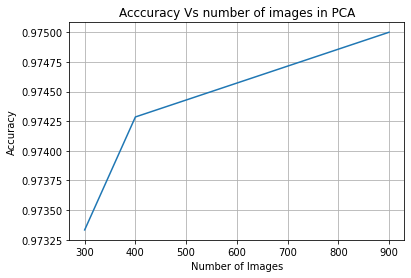

In [ ]:
Accuracy =[accuracy1,accuracy2,accuracy3]
number_of_images =[300,400,900]
plt.plot(number_of_images,Accuracy)
plt.title("Acccuracy Vs number of images in PCA")
plt.xlabel('Number of Images')
plt.ylabel('Accuracy')
plt.grid()

In [ ]:
import scipy as sc
from sklearn.neighbors import KNeighborsClassifier
def data_size(nonface_size):
  training_set=[]
  test_set=[]
  training_set_labels=[]
  test_set_labels=[]
  data =[]
  data2 = []
  label =[]
  label2 =[]
  data1 =[]
  label1 =[]
  for id in range(1,41):
      for count in range(1,11) :
        image = Image.open('s'+str(id)+'/'+str(count)+'.pgm')
        test = img_to_array(image)
        test = np.resize(test,(10304))
        data.append(test)
        label2.append("face")
  data2 = data
  #label2 = label
  for i in range(nonface_size):
    if i <10:
      image = Image.open('car/car_000'+str(i)+'.jpg')
    elif i<100:
      image = Image.open('car/car_00'+str(i)+'.jpg')
    else:
      image = Image.open('car/car_0'+str(i)+'.jpg')
      image = image.resize((92,112))
      test = img_to_array(image)
      test = np.resize(test,(10304))
      data.append(test)
      label2.append("non-face")
  for i in range(len(data)):
    if i%2==0:
      test_set.append(data[i])
      test_set_labels.append(label2[i])
    else:
      training_set.append(data[i])
      training_set_labels.append(label2[i])
  return training_set,training_set_labels,test_set,test_set_labels
  

In [ ]:
def number_of_samples_per_class(training_set,training_set_labels):
  n = 0
  for i in range(len(training_set)):
    if training_set_labels[i] == "non-face":
      n = n +1
  return n
 
def compute_mean(training_set,training_set_labels,n):
  temp1 = training_set[0:39]
  temp2 = training_set[40:40+n]
  mean = np.zeros((2,10304)) 
  mean[0,:] = np.mean(temp1,axis=0)
  mean[1,:] = np.mean(temp2,axis=0)
  return mean

def compute_overall_mean(mean):
  overall_mean = np.mean(mean,axis=0).T
  return overall_mean

def compute_Sb(mean,overall_mean,n):
  Sb = np.zeros((mean.shape[1],mean.shape[1]))
  Sb = np.add(Sb,40* ((mean[0] - overall_mean) * (mean[0] - overall_mean).T))
  Sb = np.add(Sb,n* ((mean[1] - overall_mean) * (mean[1] - overall_mean).T))
  return Sb

def compute_S(training_set,training_set_labels,mean,n):
  temp1 = training_set[0:39]
  temp2 = training_set[40:40+n]
  S = np.zeros((10304,10304))
  Z1 = temp1 - mean[0]
  temp = np.dot(Z1.T,Z1)
  S = S + temp
  Z2 = temp2 - mean[1]
  temp = np.dot(Z2.T,Z2)
  S = S + temp
  return S

def compute_inverse(S):
  inv = np.linalg.pinv(S)
  return inv 

def projection_matrix(inv,Sb):
  w, v = sc.linalg.eigh(np.dot(inv,Sb),eigvals=((10304-39),(10304-1)))
  P = v[::-1]
  return P

def get_accuracy(training_set,training_set_labels,test_set,test_set_labels,P):
  R_trainig_set = np.dot(training_set,P)
  R_test_set = np.dot(test_set,P)
  classifier = KNeighborsClassifier(n_neighbors=1)
  classifier.fit(R_trainig_set,training_set_labels)
  test_predict = classifier.predict(R_test_set)
  true_predicted_count= 0
  for i in range(len(test_set_labels)):
    if test_predict[i] == test_set_labels[i]:
      true_predicted_count = true_predicted_count +1
  accuracy = (true_predicted_count/len(test_set))
  return accuracy




In [ ]:

def LDA(training_set,training_set_labels,test_set,test_set_labels):
  n = number_of_samples_per_class(training_set,training_set_labels)
  mean = compute_mean(training_set,training_set_labels,n)
  overall_mean = compute_overall_mean(mean)
  Sb = compute_Sb(mean,overall_mean,n)
  S = compute_S(training_set,training_set_labels,mean,n)
  inv = compute_inverse(S)
  P = projection_matrix(inv,Sb)
  accuracy = get_accuracy(training_set,training_set_labels,test_set,test_set_labels,P)
  print(accuracy)
  return accuracy

In [ ]:
training_set,training_set_labels,test_set,test_set_labels=data_size(300)
accuracy1_LDA=LDA(training_set,training_set_labels,test_set,test_set_labels)
print("Accuracy=",accuracy1_LDA)

0.9933333333333333
Accuracy= 0.9933333333333333


In [ ]:
training_set,training_set_labels,test_set,test_set_labels=data_size(400)
accuracy2_LDA=LDA(training_set,training_set_labels,test_set,test_set_labels)
print(accuracy2_LDA)

0.9914285714285714
0.9914285714285714


In [ ]:
training_set,training_set_labels,test_set,test_set_labels=data_size(900)
accuracy3_LDA=LDA(training_set,training_set_labels,test_set,test_set_labels)
print(accuracy3_LDA)

0.9866666666666667
0.9866666666666667


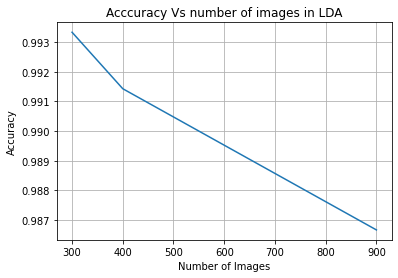

In [ ]:
import matplotlib.pyplot as plt
Accuracy =[accuracy1_LDA,accuracy2_LDA,accuracy3_LDA]
number_of_images =[300,400,900]
plt.plot(number_of_images,Accuracy)
plt.title("Acccuracy Vs number of images in LDA")
plt.xlabel('Number of Images')
plt.ylabel('Accuracy')
plt.grid()

**Bonus**

In [ ]:
import numpy as np
from numpy import linalg as LA
import scipy.linalg as la
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
alpha = np.array([0.8,0.85,0.9,0.95])
id = 1
training_set=[]
test_set=[]
training_set_labels=[]
test_set_labels=[]
data =[]
data2 = []
label =[]
label2 =[]
data1 =[]
label1 =[]
for id in range(1,41):
      for count in range(1,11) :
        image = Image.open('s'+str(id)+'/'+str(count)+'.pgm')
        test = img_to_array(image)
        test = np.resize(test,(10304))
        data.append(test)
        label2.append("face")
data2 = data
for i in range(len(data)):
    if i%2==0 and len(test_set)<120:
      test_set.append(data[i])
      test_set_labels.append(label2[i])
    else:
      training_set.append(data[i])
      training_set_labels.append(label2[i])
D=np.array(data)
D_train=np.array(training_set)
D_test=np.array(test_set)
D_training_labels=np.array(training_set_labels)
D_test_labels=np.array(test_set_labels)
M=np.array(data).mean(0)
print("C.mean vector",M)
Z=data-M
print(D.shape)
print(M.shape)
covMatrix=1/len(data)*np.dot(Z.T,Z)
print ("Covariance matrix=",covMatrix)
w , v = la.eig(covMatrix)
w1=np.diag(w)
print("eigen values=",w)
print("eigen vectors=",v)
Accuracy=[]
idx = w.argsort()[::-1]   
eigenValues = w[idx]
eigenVectors = v[:,idx]
i=0
sum=0
while i<len(eigenValues):
  sum=sum+eigenValues[i]
  i=i+1 
r=0 
sum_2=0
k=0
while k<4 : 
  while sum_2/sum<alpha[k]:
     sum_2=sum_2+eigenValues[r]
     r=r+1 
  P=eigenVectors[:,0:r].T
  print("Alpha=",alpha[k])
  print("Projection matrix=",P)
#Projection
  M_train=np.array(training_set).mean(0)
  Z_train=np.subtract(D_train,M_train)
  K_train=np.dot(P,Z_train.T)
  #print("Projection of training set",K_train)
  M_test=np.array(D_test).mean(0)
  Z_test=np.subtract(D_test,M_test)
  K_test=np.dot(P,Z_test.T)
  #np.append(K_test,np.dot(P,Z_test.T))
  #print("Projection of test set",K_test)
  knn_classifier = KNeighborsClassifier(n_neighbors = 1)
  knn_classifier.fit(K_train.real.T,D_training_labels)
  pred_test = knn_classifier.predict(K_test.real.T)
  correct_count = 0.0
  for a in range(len(D_test_labels)):
   if pred_test[a] == D_test_labels[a]:
      correct_count += 1.0
  accuracy = correct_count/float(len(D_test_labels)) 
  Accuracy.append(accuracy) 
  k=k+1
l=0
A=np.array(Accuracy)
print("PCA")
for l in range(4): 
 print("Alpha=","{:.2f}".format(alpha[l]),"Accuracy=", A[l]) 

C.mean vector [85.6175 85.5775 85.925  ... 76.87   75.865  75.2275]
(400, 10304)
(10304,)
Covariance matrix= [[1280.441    1268.7012   1262.9388   ... -152.96724  -112.15412
   -58.787983]
 [1268.7012   1273.3885   1260.7036   ... -150.07242  -110.54952
   -58.486385]
 [1262.9388   1260.7036   1264.7047   ... -148.31975  -105.530136
   -57.057934]
 ...
 [-152.96724  -150.07242  -148.31975  ... 2199.663    1929.6897
  1781.9421  ]
 [-112.15412  -110.54952  -105.530136 ... 1929.6897   1973.657
  1837.1732  ]
 [ -58.787983  -58.486385  -57.057934 ... 1781.9421   1837.1732
  1932.2609  ]]
eigen values= [ 2.8168530e+06+0.000000e+00j  2.0645665e+06+0.000000e+00j
  1.0943052e+06+0.000000e+00j ... -3.2710732e-04+1.474549e-05j
 -3.2710732e-04-1.474549e-05j -3.5270065e-04+0.000000e+00j]
eigen vectors= [[ 2.1251799e-03+0.0000000e+00j  1.4685200e-02+0.0000000e+00j
  -1.9929595e-02+0.0000000e+00j ...  2.9106819e-04+2.5672780e-04j
   2.9106819e-04-2.5672780e-04j -5.1733269e-04+0.0000000e+00j]
 [ 2.1

In [ ]:
accuracy4_LDA=LDA(training_set,training_set_labels,test_set,test_set_labels)
print("LDA")
print("Accuracy=",accuracy4_LDA)

predicted class:  face  subject class  face
for subject  0  the prediction is RIGHT
predicted class:  face  subject class  face
for subject  1  the prediction is RIGHT
predicted class:  face  subject class  face
for subject  2  the prediction is RIGHT
predicted class:  face  subject class  face
for subject  3  the prediction is RIGHT
predicted class:  face  subject class  face
for subject  4  the prediction is RIGHT
predicted class:  face  subject class  face
for subject  5  the prediction is RIGHT
predicted class:  face  subject class  face
for subject  6  the prediction is RIGHT
predicted class:  face  subject class  face
for subject  7  the prediction is RIGHT
predicted class:  face  subject class  face
for subject  8  the prediction is RIGHT
predicted class:  face  subject class  face
for subject  9  the prediction is RIGHT
predicted class:  face  subject class  face
for subject  10  the prediction is RIGHT
predicted class:  face  subject class  face
for subject  11  the prediction